In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned algerian fire dataset')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
#droping day month and year
df.drop(labels=['day', 'month', 'year'], axis=1, inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  242 non-null    int64  
 1   RH           242 non-null    int64  
 2   Ws           242 non-null    int64  
 3   Rain         242 non-null    float64
 4   FFMC         242 non-null    float64
 5   DMC          242 non-null    float64
 6   DC           242 non-null    float64
 7   ISI          242 non-null    float64
 8   BUI          242 non-null    float64
 9   FWI          242 non-null    float64
 10  Classes      242 non-null    object 
 11  region       242 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.8+ KB


In [7]:
#converting the categorical feature in numerical feature
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df['Classes'].value_counts()

1    137
0    105
Name: Classes, dtype: int64

In [10]:
#in this example we will try to predict the FWI, so dividing the data into dependent and independent features
x = df.drop('FWI', axis=1)
y = df['FWI']

In [13]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
x_train.shape, x_test.shape

((181, 11), (61, 11))

In [16]:
#feature selection using correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


In [18]:
''' feature selection using correlation is done by dropping the independent features which are 
highly correlated, since they are both tend to behave in the same way'''

' feature selection using correlation is done by dropping the independent features which are \nhighly correlated, since they are both tend to behave in the same way'

In [41]:
def correlation(dataset, threshold):
    corCol = set()
    corrMatrix=dataset.corr()
    for i in range(len(corrMatrix.columns)):
        for j in range(i):
            if abs(corrMatrix.iloc[i,j])>threshold:
                colName = corrMatrix.columns[i]
                corCol.add(colName)
    return corCol

In [42]:
corrColumns = correlation(x_train, 0.85)

In [46]:
corrColumns
#included (BUI, DC)

set()

In [47]:
x_train.drop(corrColumns, axis=1, inplace=True)
x_test.drop(corrColumns, axis=1, inplace=True)
x_train.shape, x_test.shape

((181, 9), (61, 9))

In [49]:
#feature scaling or standardisation
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
x_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]])

Text(0.5, 1.0, 'After')

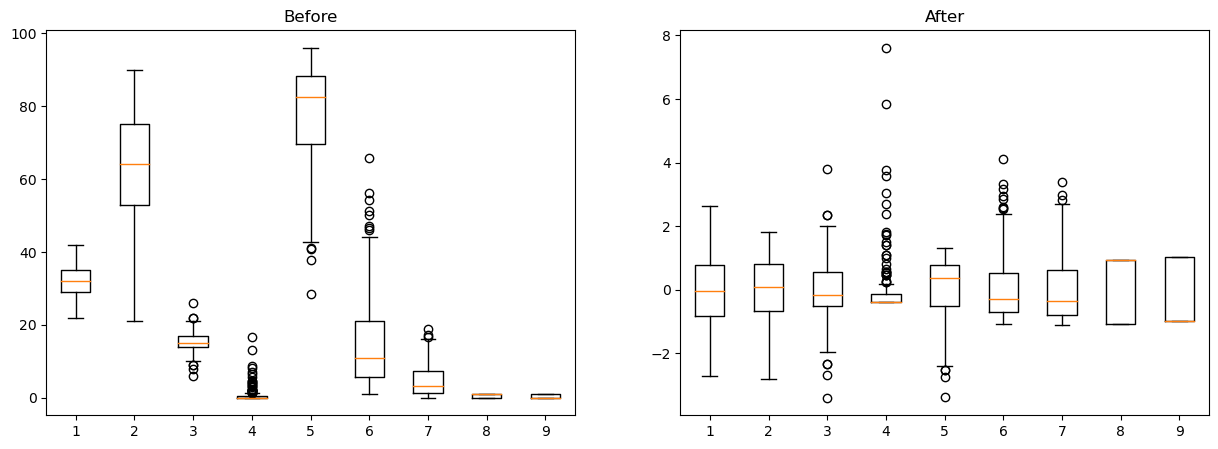

In [51]:
## using boxplot to see the effect of standard scaler on outliers
plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(x_train)
plt.title('Before')
plt.subplot(1,2,2)
plt.boxplot(x_train_scaled)
plt.title('After')

0.5838063599546985  mean absolute error
0.983523052949508  r2 score


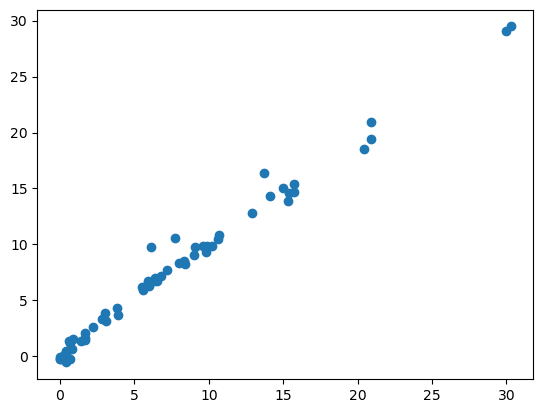

In [54]:
##applying linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(x_train_scaled, y_train)
y_pred=reg.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(mae, " mean absolute error")
print(score, ' r2 score')
plt.scatter(y_test, y_pred)

1.145997996939169
0.9497712193501187


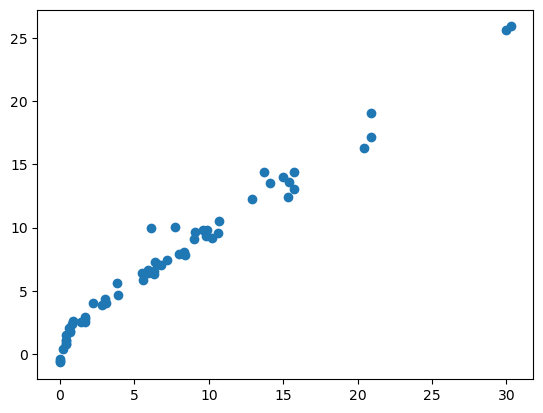

In [56]:
#applying lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred_lasso)
score = r2_score(y_test, y_pred_lasso)
print(mae)
print(score)
plt.scatter(y_test, y_pred_lasso)

0.6125515638101013
0.982698355229298


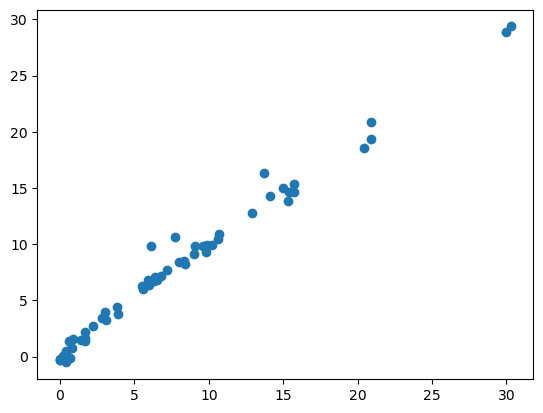

In [58]:
##applying ridge reg
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred_ridge)
score = r2_score(y_test, y_pred_ridge)
print(mae)
print(score)
plt.scatter(y_test, y_pred_ridge)

In [59]:
##pickling the standard scaler and ridge model
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))